In [8]:
%matplotlib inline

# Matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from subprocess import check_output

print(check_output(["ls" , "../data"]).decode("utf-8"))

combats.csv
pokemon.csv
tests.csv



In [5]:
data = pd.read_csv('../data/pokemon.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


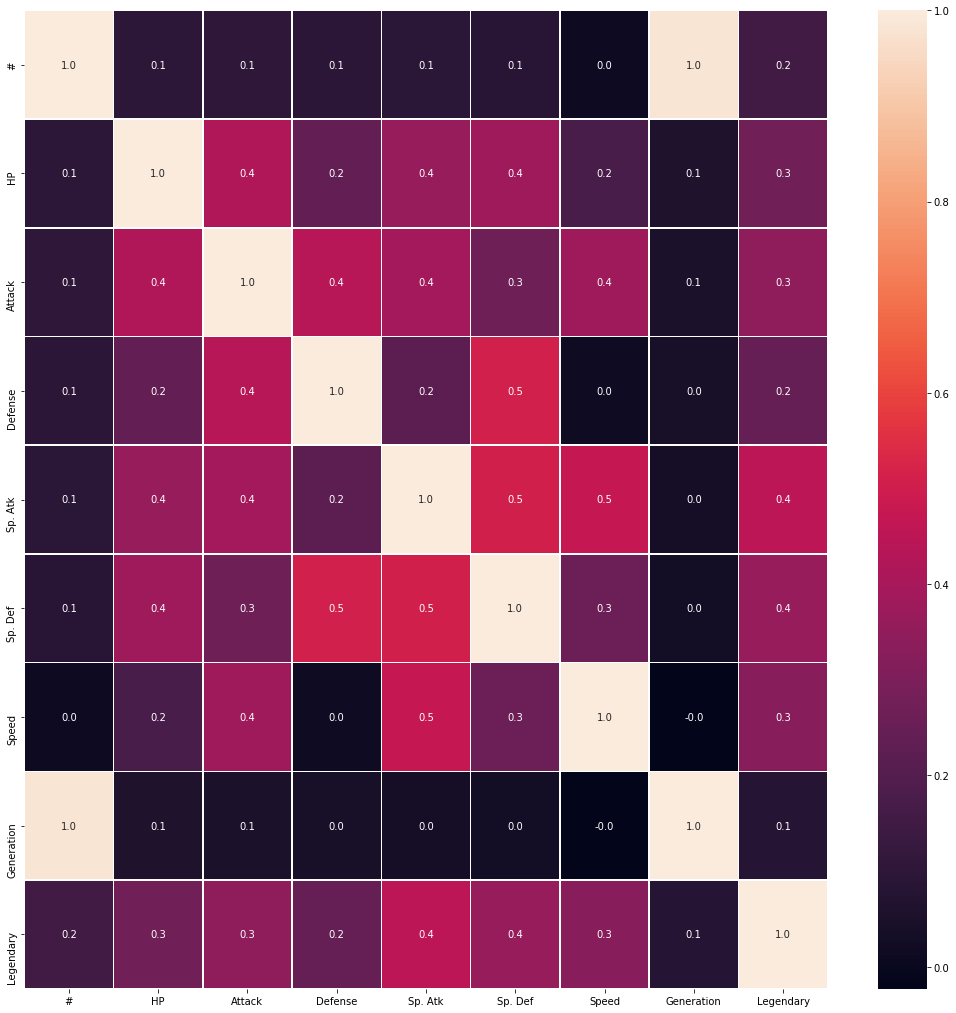

In [5]:
f , ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr() , annot=True , linewidth = .5 , fmt = '.1f' , ax = ax)

In [6]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [7]:
data.columns

Index([u'#', u'Name', u'Type 1', u'Type 2', u'HP', u'Attack', u'Defense',
       u'Sp. Atk', u'Sp. Def', u'Speed', u'Generation', u'Legendary'],
      dtype='object')

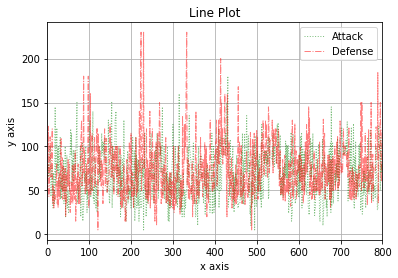

In [9]:
# Line Plot
data.Speed.plot(kind = 'line' , color = 'g' , label = 'Attack' , linewidth = 1 , alpha = 0.5 , grid = True , linestyle = ':')
data.Defense.plot(color = 'r' , label = 'Defense' , linewidth = 1 , alpha = 0.5 , grid = True , linestyle = '-.')
plt.legend(loc = 'upper right')   # legend : puts label into plot
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')

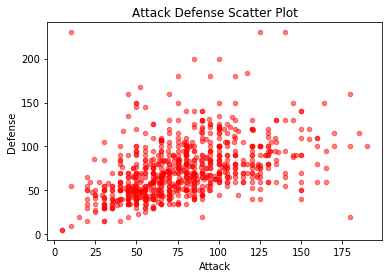

In [12]:
# Scatter Plot
data.plot(kind = 'scatter' , x = 'Attack' , y = 'Defense' , alpha = 0.5 , color = 'red')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

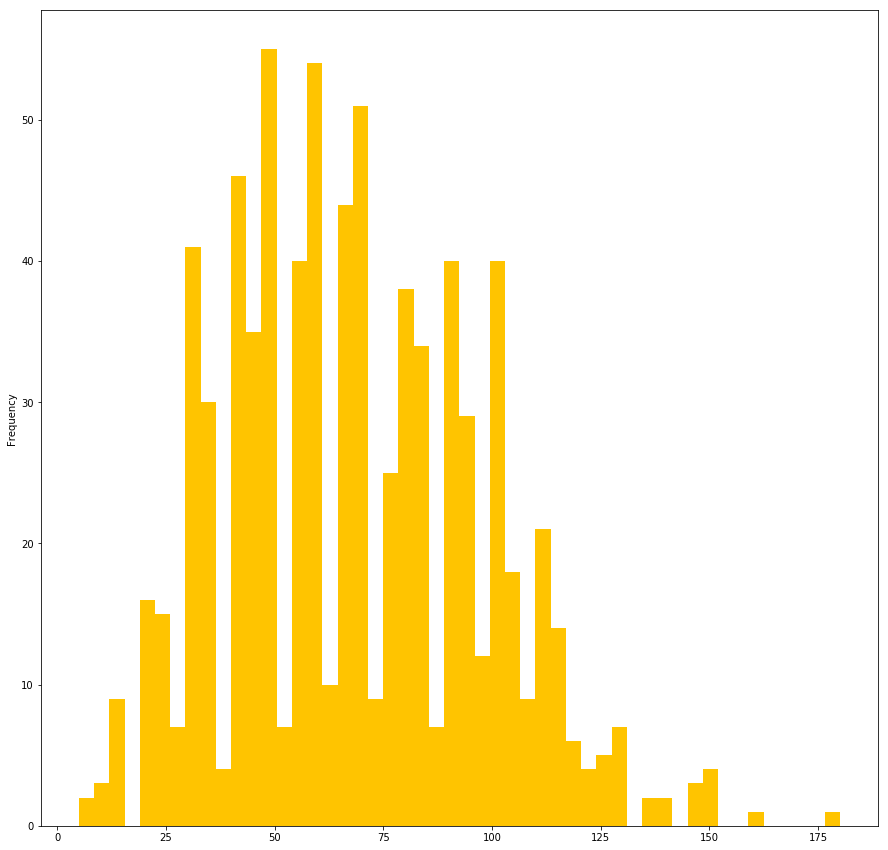

In [15]:
# Histogram
# bins : number of bar in figure
data.Speed.plot(kind = 'hist' , bins = 50 , figsize = (15 , 15) , color = '#FFC400')

In [36]:
data.Speed.plot(kind = 'hist' , bins = 50)
plt.clf()

# Pandas

In [41]:
series = data['Defense']
print(type(series))
data_frame = data[['Defense']]
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [42]:
x = data['Defense'] > 200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [48]:
data[np.logical_and(data['Defense'] > 200 , data['Attack'] > 100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [49]:
# This is also same with previous code view . Therefore we can alse use '&' for filtering.
data[(data['Defense'] > 200) & (data['Attack'] > 100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [56]:
for index , value in data[['Attack']][0:1].iterrows() :
    print(index , " : " , value)

(0, ' : ', Attack    49
Name: 0, dtype: int64)


# Cleaning Data

In [59]:
print(data['Type 1'].value_counts(dropna = False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [60]:
data.describe() # describe function will ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


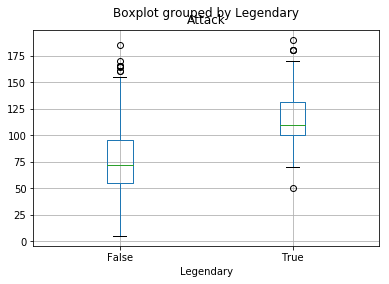

In [61]:
# Box plots : 可视化基础统计数据，如离群值，min/max or 四分位数
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column = 'Attack' , by = 'Legendary')

In [63]:
# melt data 提取整理数据
head_data = data.head()

melted = pd.melt(frame = head_data , id_vars = 'Name' , value_vars = ['Attack' , 'Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [66]:
# Pivoting data 隐藏数据
melted.pivot(index = 'Name' , columns = 'variable' , values = 'value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [67]:
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [68]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


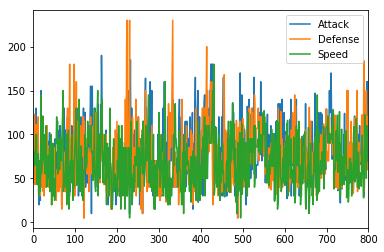

In [12]:
data1 = data.loc[: , ["Attack" , "Defense" , "Speed"]]
data1.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fc3cb90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1fe5f6d0>], dtype=object)

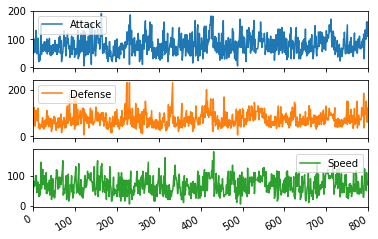

In [13]:
data1.plot(subplots = True)

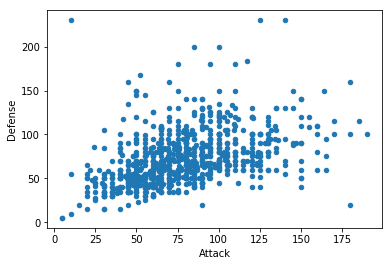

In [14]:
data1.plot(kind = 'scatter' , x = 'Attack' , y = 'Defense')

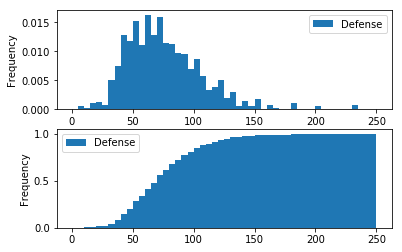

In [15]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)

In [16]:
type(data)

pandas.core.frame.DataFrame

In [17]:
data.ix[1:3]

/Users/zouziwen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
